# DBSCAN

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Simple 2D example

Based on [this](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html).

In [2]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)


In [3]:
X

array([[ 0.84022039,  1.14802236],
       [-1.15474834, -1.2041171 ],
       [ 0.67863613,  0.72418009],
       ...,
       [ 0.26798858, -1.27833405],
       [-0.88628813, -0.30293249],
       [ 0.60046048, -1.29605472]])

We can show the distribution of the data using heatmap to get some ideas of the density of the data.

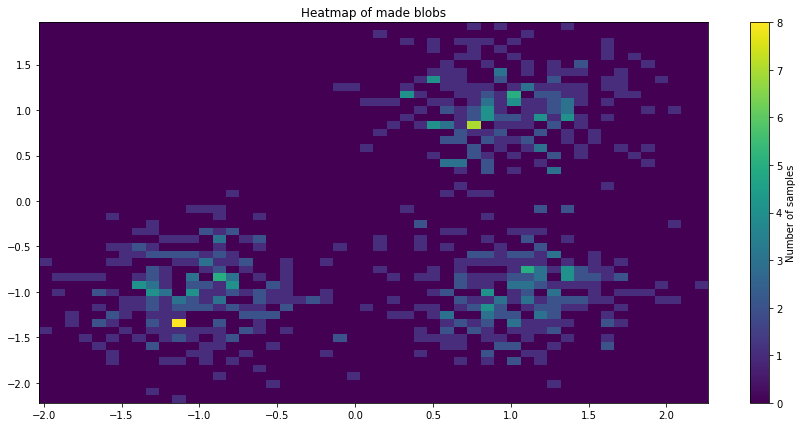

In [4]:
# Set size of the figure
plt.figure(figsize=(15, 7))
# Plot 2D histogram from X
# We can choose different colormaps (i.e., viridis, plasma, inferno, magma, cividis).
plt.hist2d(X[:,0], X[:,1], bins=50, cmap='viridis')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of samples')

# Add title and labels to plot.

plt.title('Heatmap of made blobs')

# Show the plot.
plt.show()

In [5]:
X = StandardScaler().fit_transform(X)

In [6]:
X

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ...,
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])

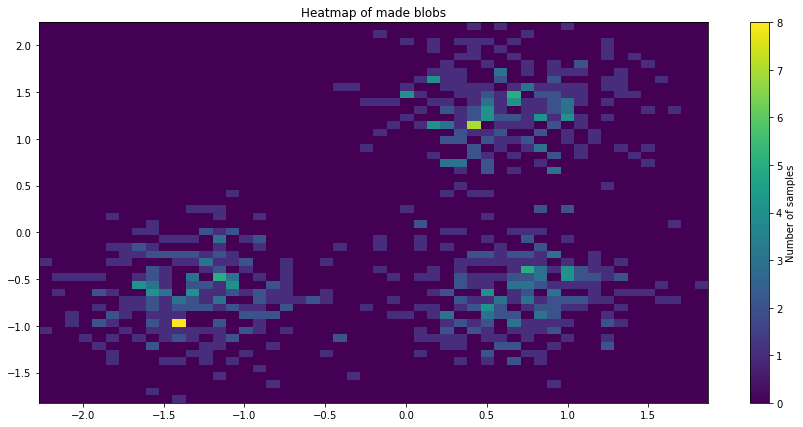

In [7]:
# Set size of the figure
plt.figure(figsize=(15, 7))
# Plot 2D histogram from X
# We can choose different colormaps (i.e., viridis, plasma, inferno, magma, cividis).
plt.hist2d(X[:,0], X[:,1], bins=50, cmap='viridis')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of samples')

# Add title and labels to plot.

plt.title('Heatmap of made blobs')

# Show the plot.
plt.show()

In [8]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

DBSCAN(eps=0.3, min_samples=10)
Estimated number of clusters: 3
Estimated number of noise points: 18


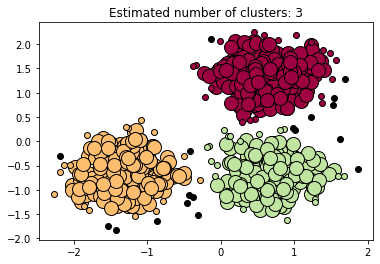

In [9]:
# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Based on this [tutorial](https://www.dummies.com/programming/big-data/data-science/how-to-create-an-unsupervised-learning-model-with-dbscan/).

## The Iris dataset

In [10]:
#Load dataset
iris = datasets.load_iris()

In [11]:
dbscan = DBSCAN(eps=0.4, metric='euclidean', min_samples=5)

In [12]:
dbscan.fit(iris.data)

DBSCAN(eps=0.4)

In [13]:
#Compare this to the targets above:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,
       -1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  2, -1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  2,
        3,  3,  3, -1, -1, -1, -1, -1,  3,  3,  3,  2, -1,  3,  3, -1, -1,
       -1,  3,  2, -1,  2,  3, -1,  2,  2,  3, -1, -1, -1,  3,  2, -1, -1,
        3,  3,  2,  3,  3,  3,  2,  3,  3,  3,  2,  3,  3,  2])

Here 0, 1,...are cluster colors, while -1 is noise (outliers). There "should" be 3 clusters.